# TSLA Price Prediction

## 1. Introduction

### Description

### Importing Libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

import random
import klib
import scipy
from sklearn.model_selection import train_test_split, KFold
import statsmodels.tools.tools as stattools
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error

In [47]:
# To ignore the warning messages
warnings.filterwarnings('ignore')

### Reading Data and Checking Data Characteristics

In [48]:
# Read data into data frames
df = pd.read_csv('/Users/johnvincent/Desktop/TSLA_preprocessed.csv')


In [49]:
df.head()

,Date,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,Volume_TSLA,EPS_qtr,Revenue,oper_cash_fl,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,3/11/22,280.066681,281.266663,264.589996,265.116669,265.116669,67037100,0.68,17719000000,4585000000,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,3/14/22,260.203339,266.899994,252.013336,255.456665,255.456665,71152200,0.68,17719000000,4585000000,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,3/15/22,258.423340,268.523346,252.190002,267.296661,267.296661,66841200,0.68,17719000000,4585000000,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,3/16/22,269.666656,280.666656,267.420013,280.076660,280.076660,84028800,0.68,17719000000,4585000000,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,3/17/22,276.996674,291.666656,275.239990,290.533325,290.533325,66582900,0.68,17719000000,4585000000,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000


In [50]:
# Check the data dimension
df.shape

(380, 28)

In [51]:
# Get attribute names
df.columns

Index(['Date', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',
       'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'],
      dtype='object')

In [52]:
# Check data characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            380 non-null    object 
 1   Open_TSLA       380 non-null    float64
 2   High_TSLA       380 non-null    float64
 3   Low_TSLA        380 non-null    float64
 4   Close_TSLA      380 non-null    float64
 5   Adj_Close_TSLA  380 non-null    float64
 6   Volume_TSLA     380 non-null    int64  
 7   EPS_qtr         380 non-null    float64
 8   Revenue         380 non-null    int64  
 9   oper_cash_fl    380 non-null    int64  
 10  gross_mrgn      380 non-null    float64
 11  oper_mrgn       380 non-null    float64
 12  net_mrgn        380 non-null    float64
 13  pe_ann          380 non-null    float64
 14  pe_qtr          380 non-null    float64
 15  fed_funds_rate  380 non-null    float64
 16  Open_NDQ        380 non-null    float64
 17  High_NDQ        380 non-null    flo

In [53]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Divide features into arrays by type
columns = ['Date', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',
       'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'] #28 columns

tesla = ['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',] #14 columns

nasdaq = ['Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ'] #6 columns

spx = ['Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'] #6 columns

## 2. Exploratory Data Analysis

### Checking Missing Values

In [54]:
# Checking Null Values
df.isnull().sum()

Date              0
Open_TSLA         0
High_TSLA         0
Low_TSLA          0
Close_TSLA        0
Adj_Close_TSLA    0
Volume_TSLA       0
EPS_qtr           0
Revenue           0
oper_cash_fl      0
gross_mrgn        0
oper_mrgn         0
net_mrgn          0
pe_ann            0
pe_qtr            0
fed_funds_rate    0
Open_NDQ          0
High_NDQ          0
Low_NDQ           0
Close_NDQ         0
Adj Close_NDQ     0
Volume_NDQ        0
Open_SPX          0
High_SPX          0
Low_SPX           0
Close_SPX         0
Adj_Close_SPX     0
Volume_SPX        0
dtype: int64

0 NaN values in the dataframe

### Checking duplicated Values

In [55]:
df.duplicated().sum()

0

0 duplicated values in the dataframe

### Understanding of price range categories

In [56]:
df.nunique() #check cardinality to see if variable type fits

Date              379
Open_TSLA         375
High_TSLA         373
Low_TSLA          375
Close_TSLA        377
Adj_Close_TSLA    377
Volume_TSLA       379
EPS_qtr             6
Revenue             7
oper_cash_fl        7
gross_mrgn          6
oper_mrgn           7
net_mrgn            7
pe_ann            378
pe_qtr            378
fed_funds_rate     12
Open_NDQ          380
High_NDQ          380
Low_NDQ           380
Close_NDQ         380
Adj Close_NDQ     380
Volume_NDQ        380
Open_SPX          380
High_SPX          378
Low_SPX           379
Close_SPX         379
Adj_Close_SPX     379
Volume_SPX        380
dtype: int64

In [57]:
df['Date']

0      3/11/22
1      3/14/22
2      3/15/22
3      3/16/22
4      3/17/22
        ...   
375     9/8/23
376     9/8/23
377    9/11/23
378    9/12/23
379    9/13/23
Name: Date, Length: 380, dtype: object

In [58]:
df['Date'] = pd.to_datetime(df['Date']) #convert to datetime64 data type
df['Date']

0     2022-03-11
1     2022-03-14
2     2022-03-15
3     2022-03-16
4     2022-03-17
         ...    
375   2023-09-08
376   2023-09-08
377   2023-09-11
378   2023-09-12
379   2023-09-13
Name: Date, Length: 380, dtype: datetime64[ns]

### Data Visualization: Analyzing the Relationship Between Variables

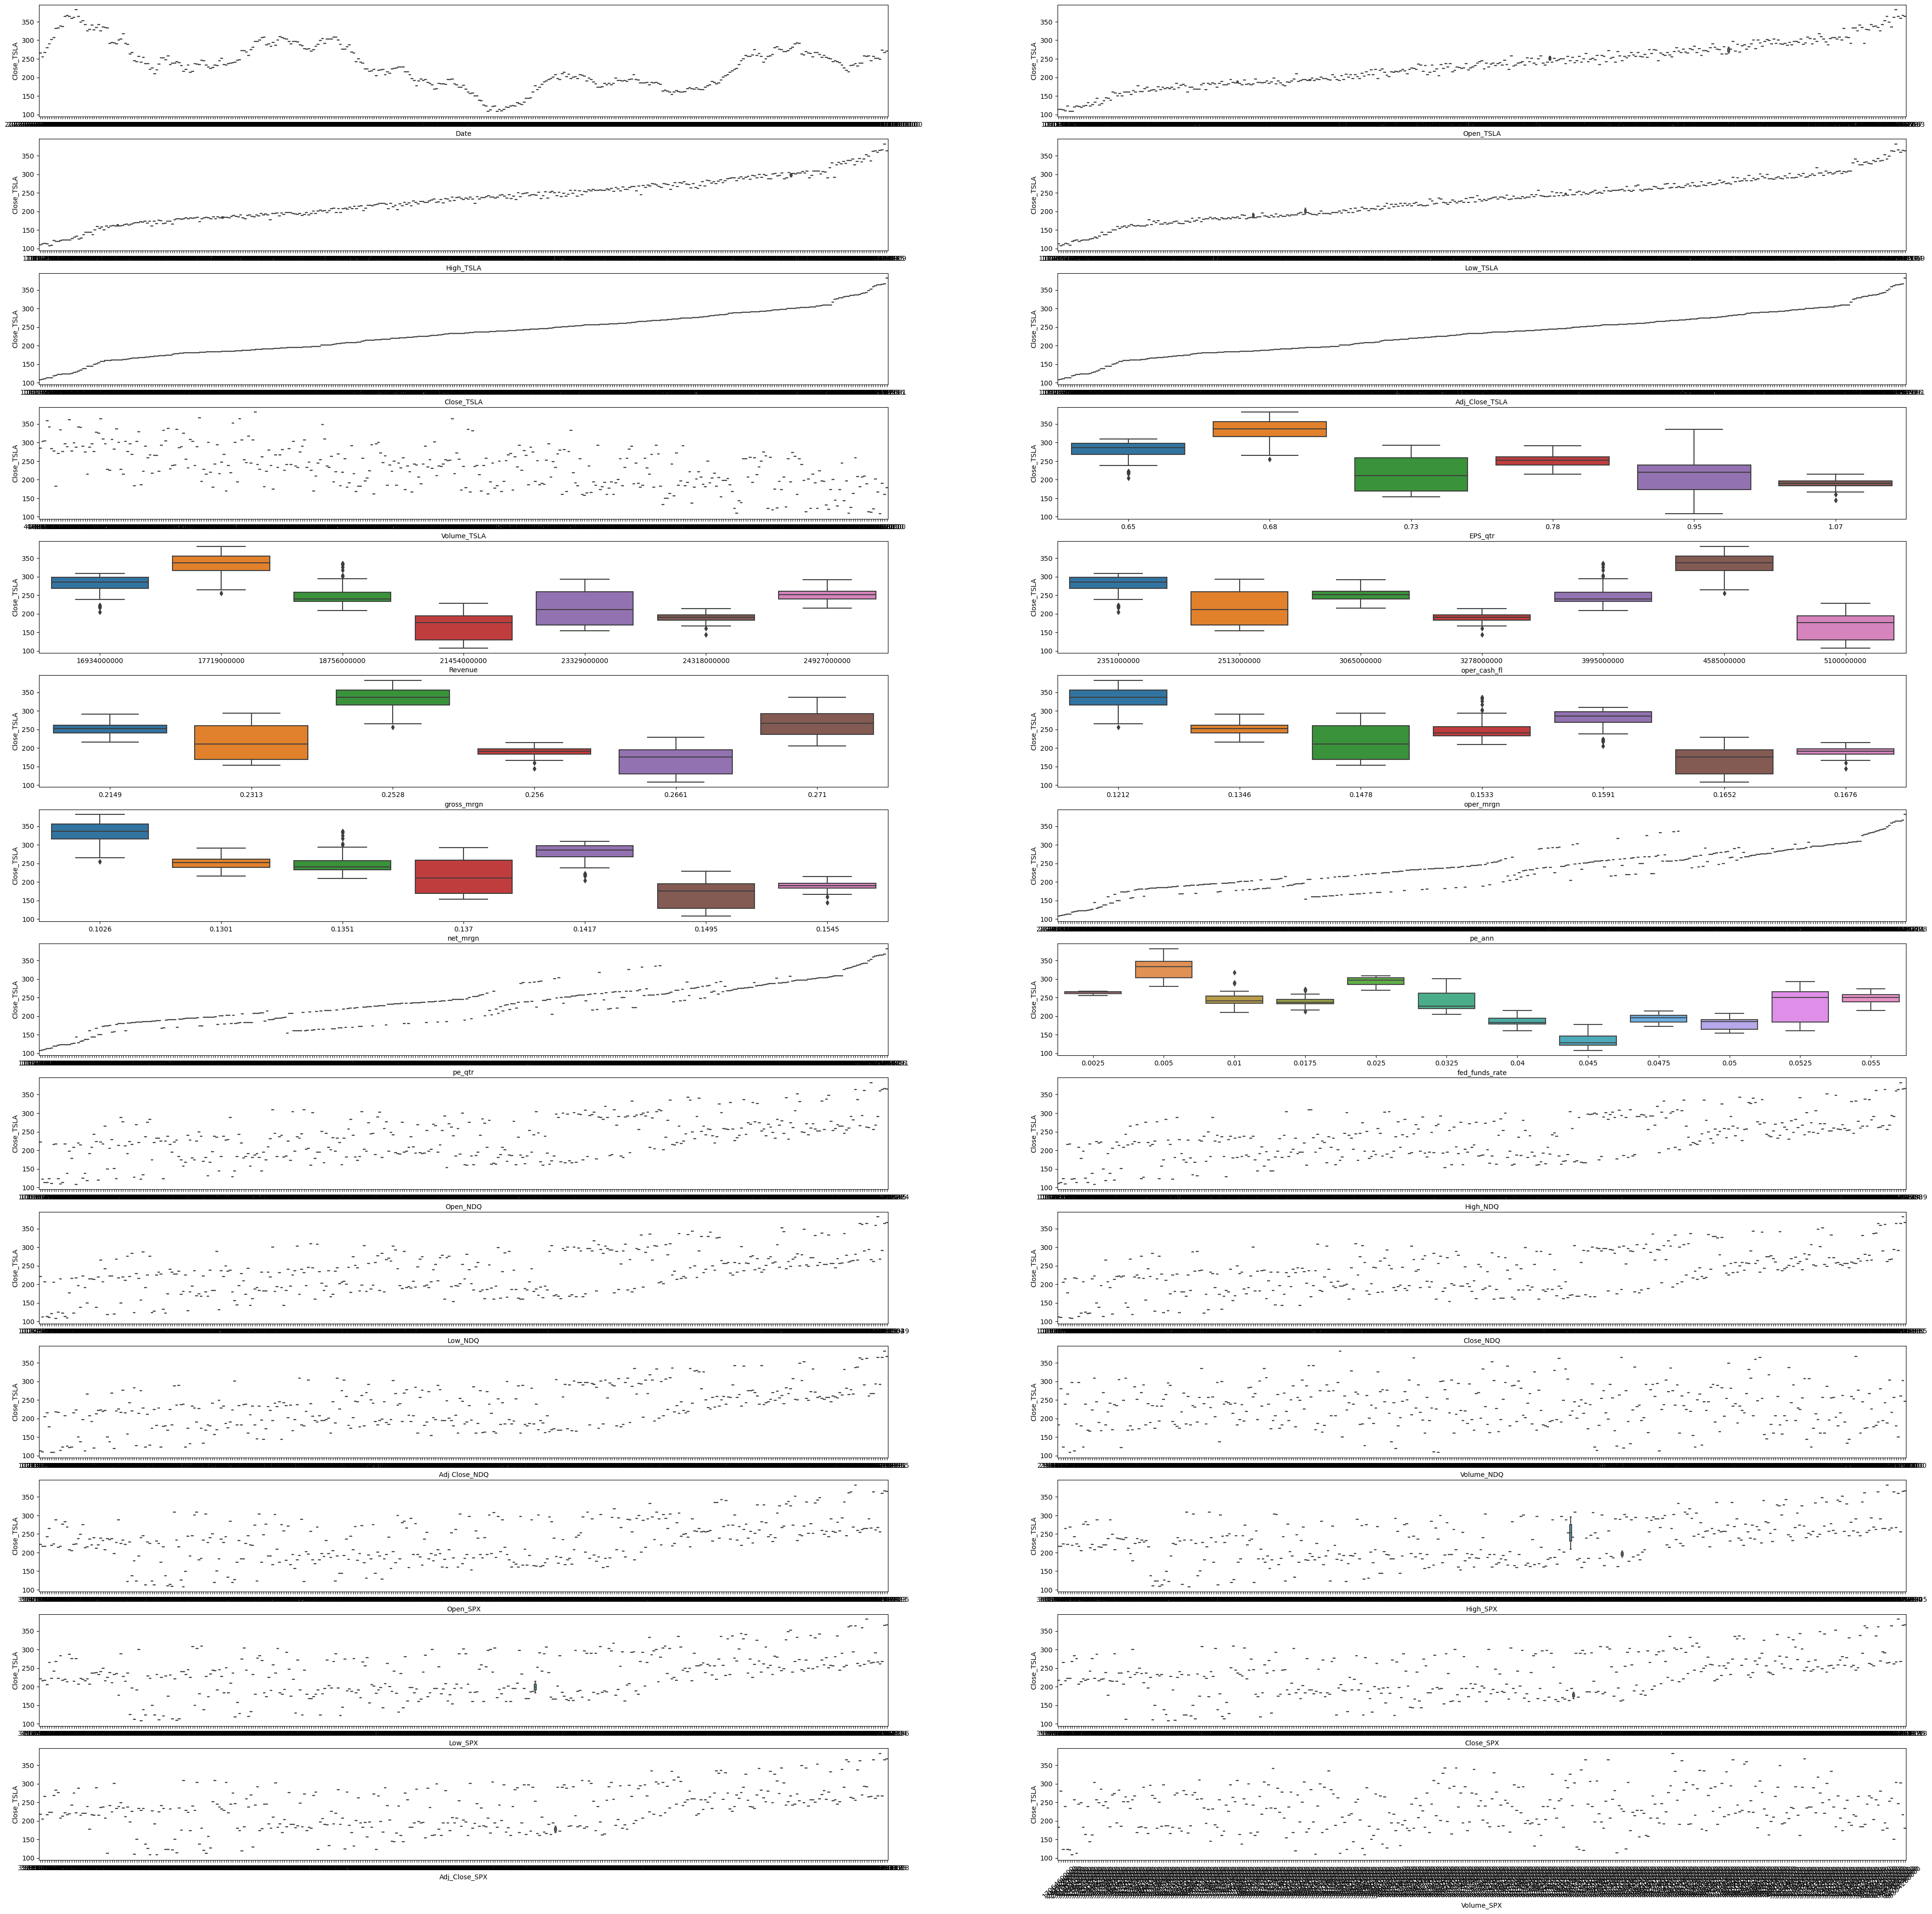

In [ ]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 14-by-2 grid of subplots to display
fig, ax = plt.subplots(14,2, figsize=(50,50))

target = 'Close_TSLA'

# FOR loop that iterates through each feature in the "columns" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
for var, subplot in zip(columns, ax.flatten()):
    sns.boxplot(x=var, y=target, data=df, ax=subplot)
    plt.xticks(rotation=45)
plt.show()

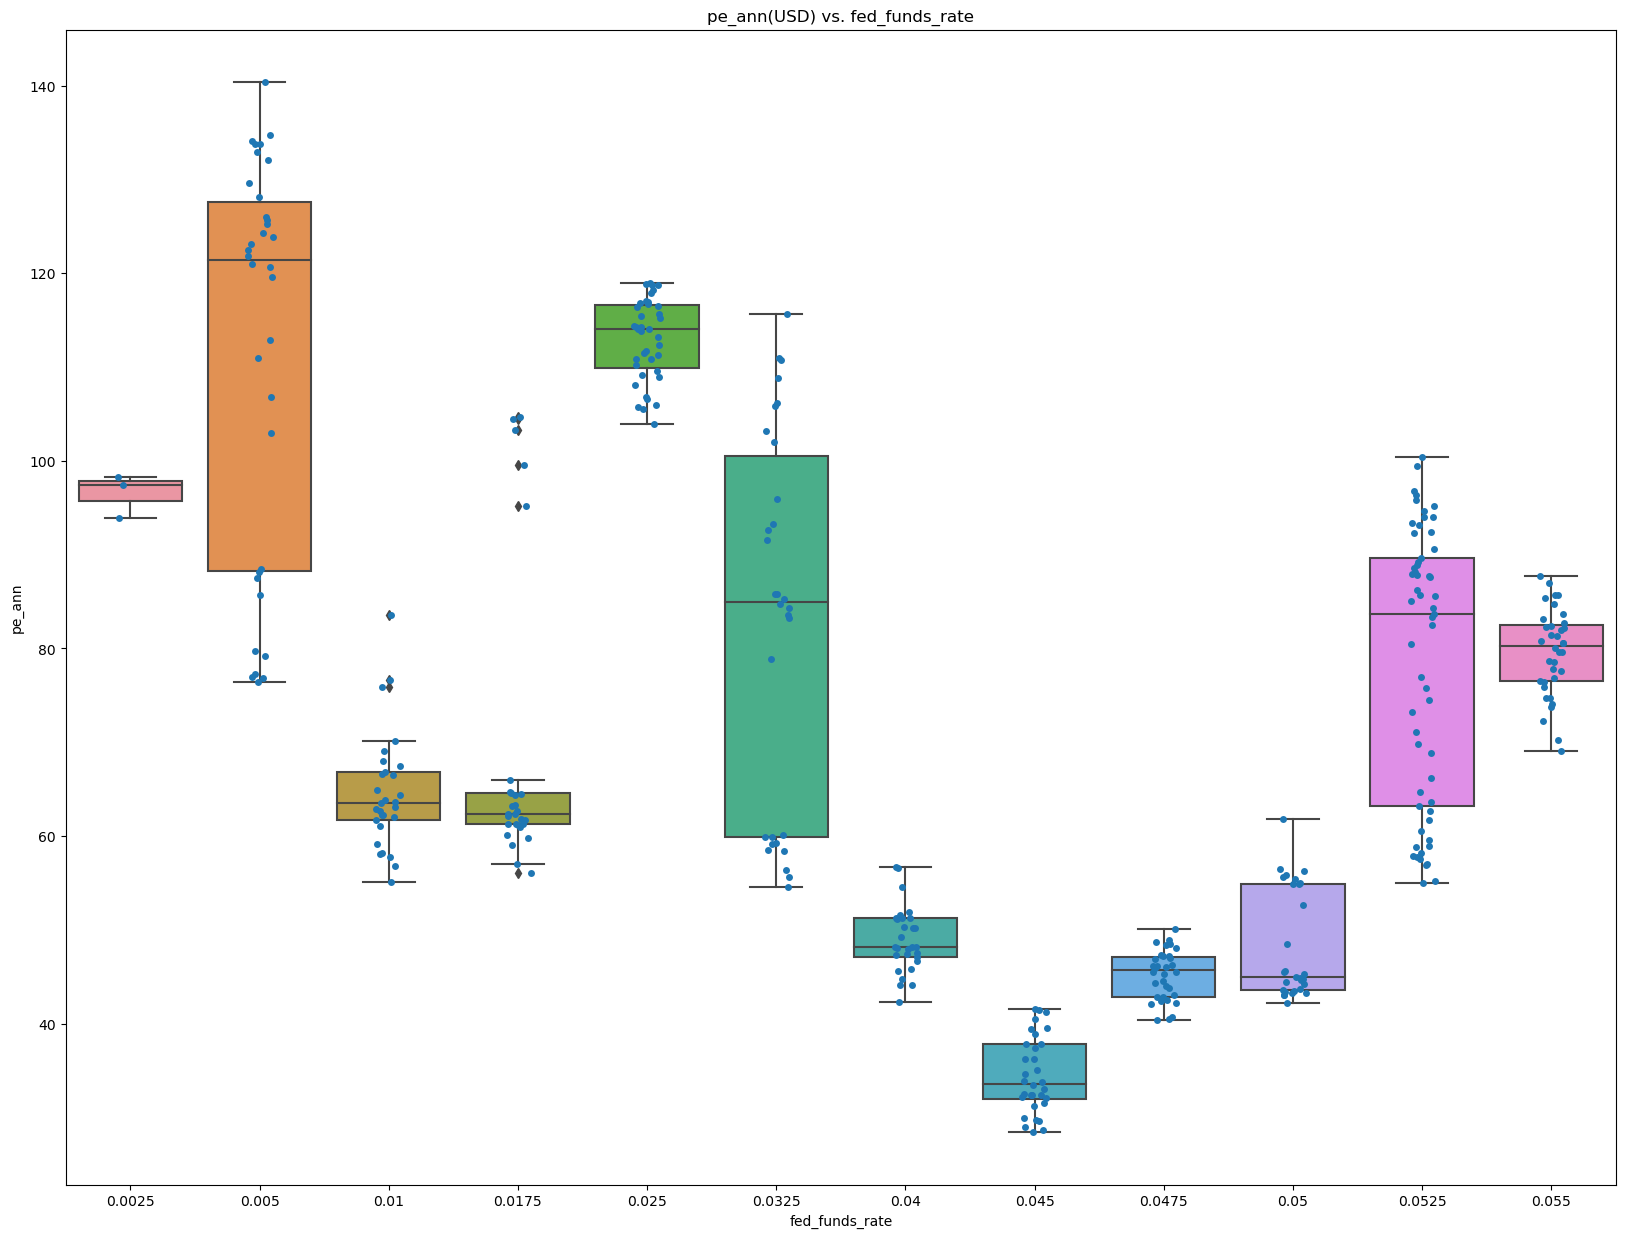

In [60]:
target_y = 'pe_ann'
column_x = 'fed_funds_rate'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

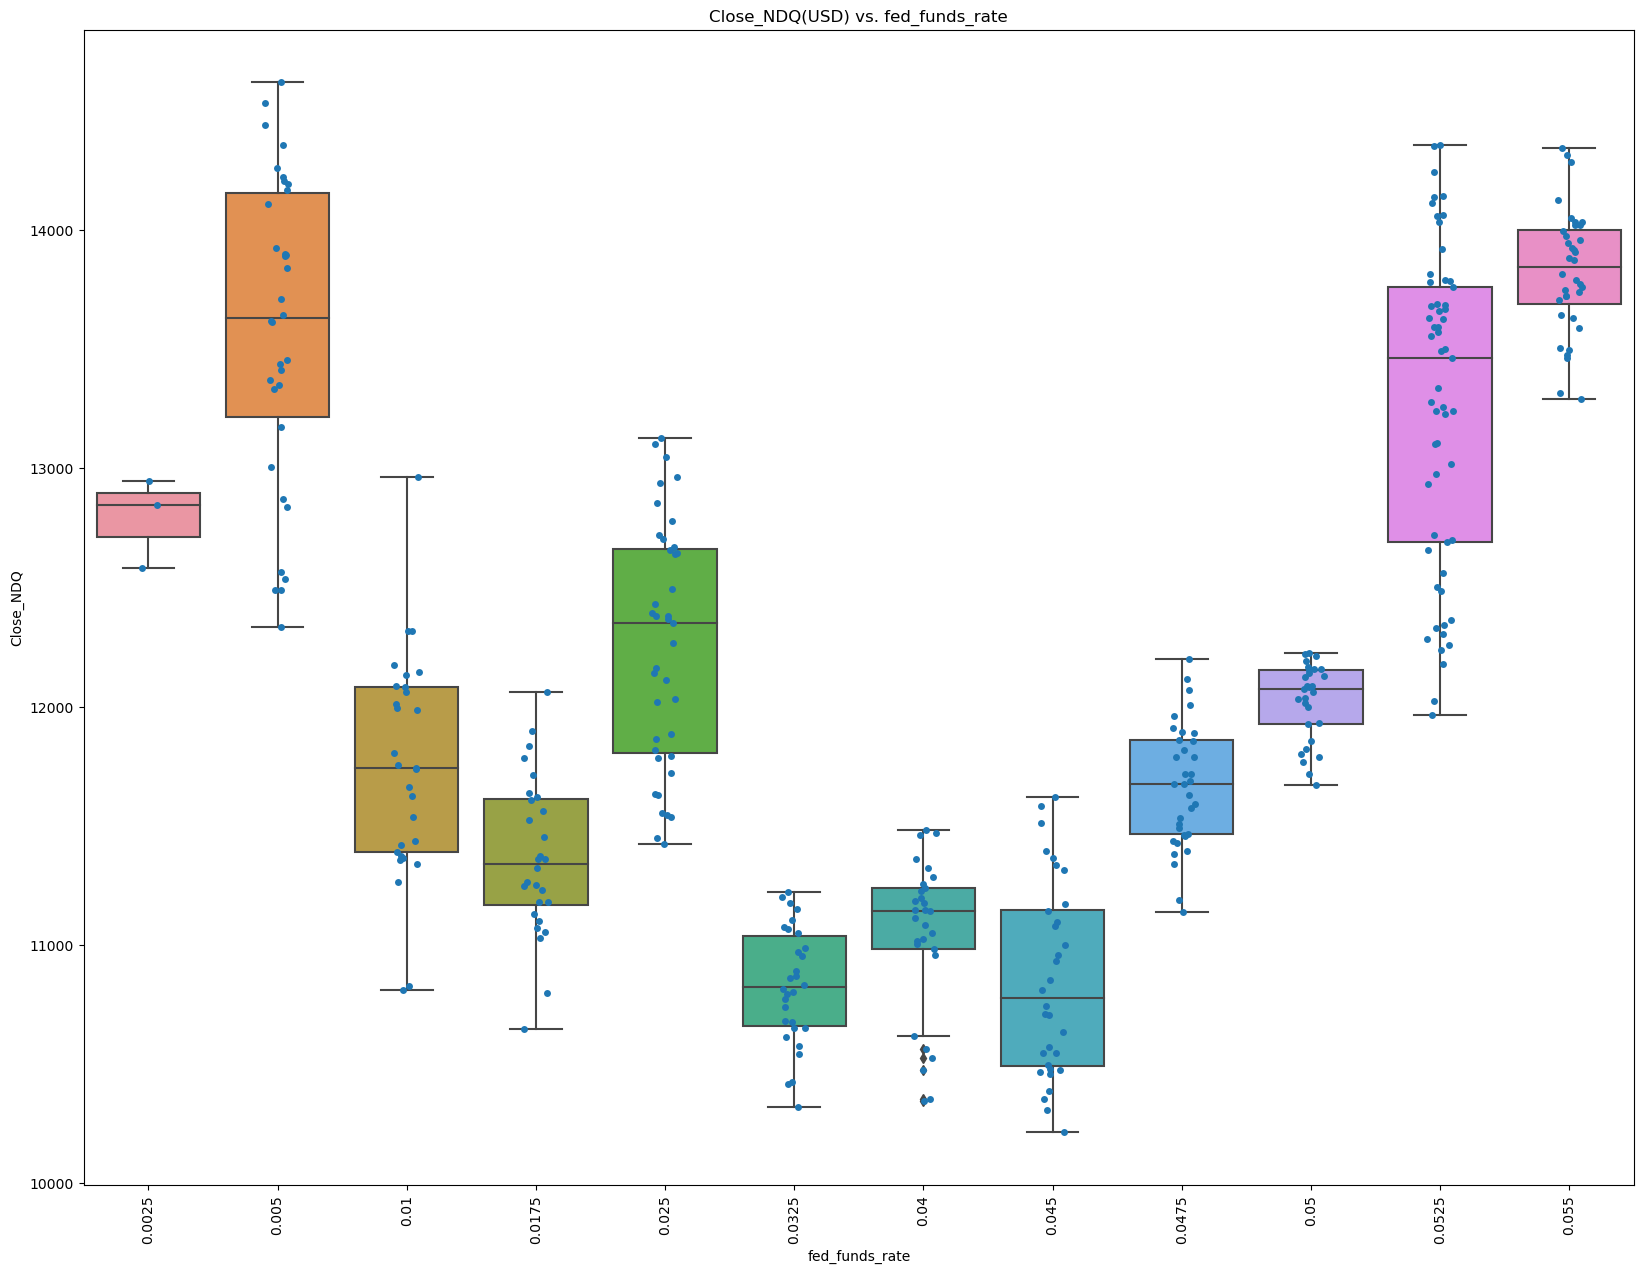

In [61]:
target_y = 'Close_NDQ'
column_x = 'fed_funds_rate'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=90)
plt.show()

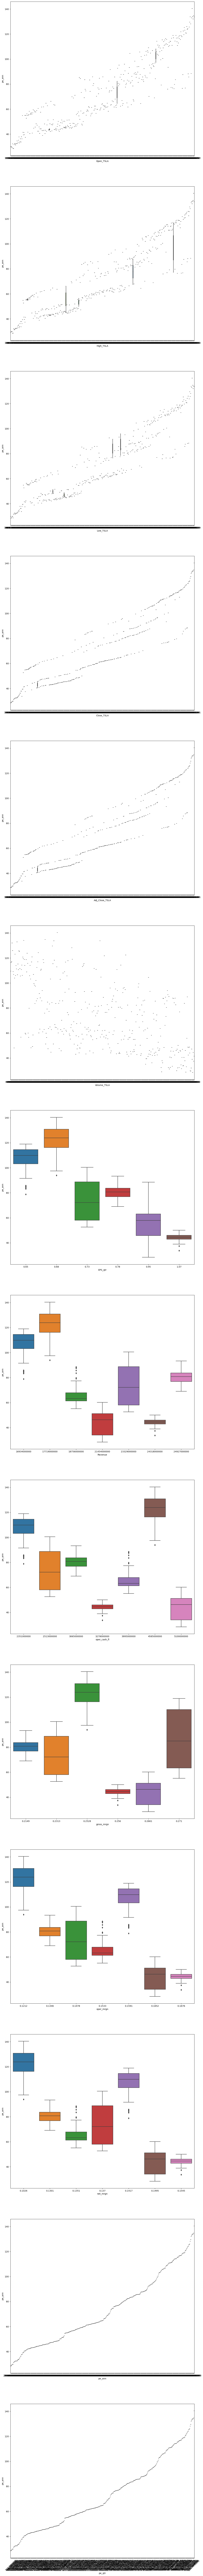

In [ ]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 3-by-1 grid of subplots to display
fig, ax = plt.subplots(14,1, figsize=(15,210))

target = 'pe_ann'

plt.xticks(rotation=45)

# FOR loop that iterates through each feature in the "categorical" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
for var, subplot in zip(tesla, ax.flatten()):
    sns.boxplot(x=var, y=target, data=df, ax=subplot)
plt.show()

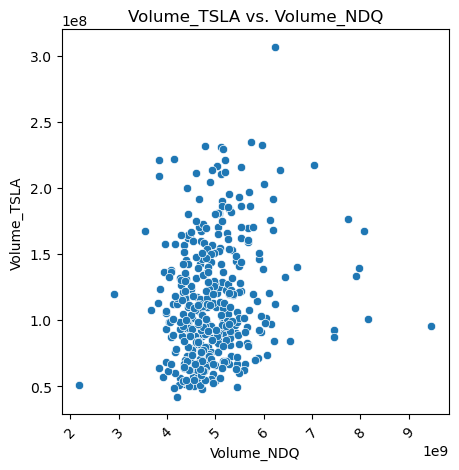

In [63]:
target_y = 'Volume_TSLA'
column_x = 'Volume_NDQ'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

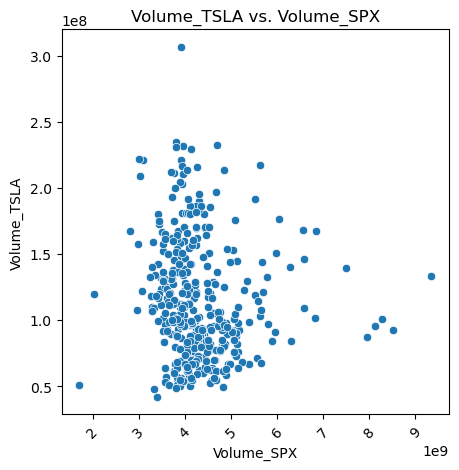

In [64]:
target_y = 'Volume_TSLA'
column_x = 'Volume_SPX'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

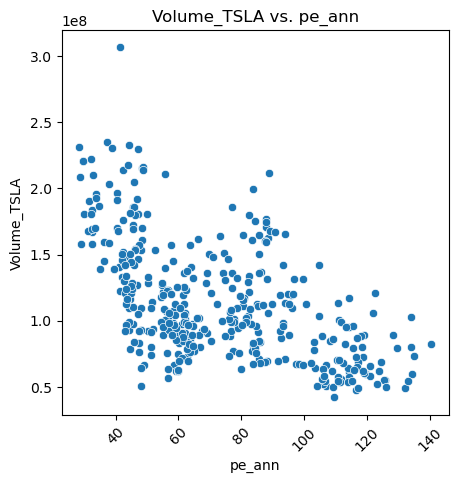

In [65]:
target_y = 'Volume_TSLA'
column_x = 'pe_ann'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

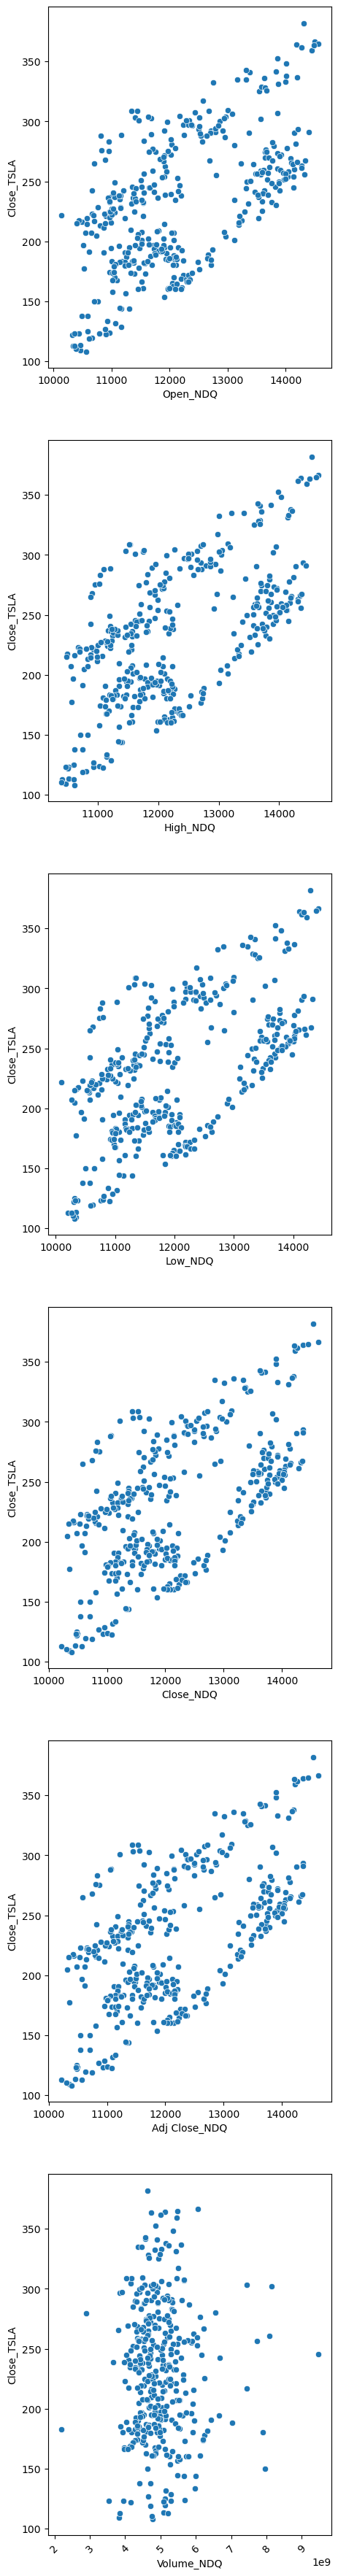

In [66]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 12-by-1 grid of subplots to display
fig, ax = plt.subplots(6,1, figsize=(5,45))

target = 'Close_TSLA'

plt.xticks(rotation=45)

# FOR loop that iterates through each feature in the "nominal" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
for var, subplot in zip(nasdaq, ax.flatten()):
    sns.scatterplot(x=var, y=target, data=df, ax=subplot)
plt.show()

### Heatmap of correlation values by feature

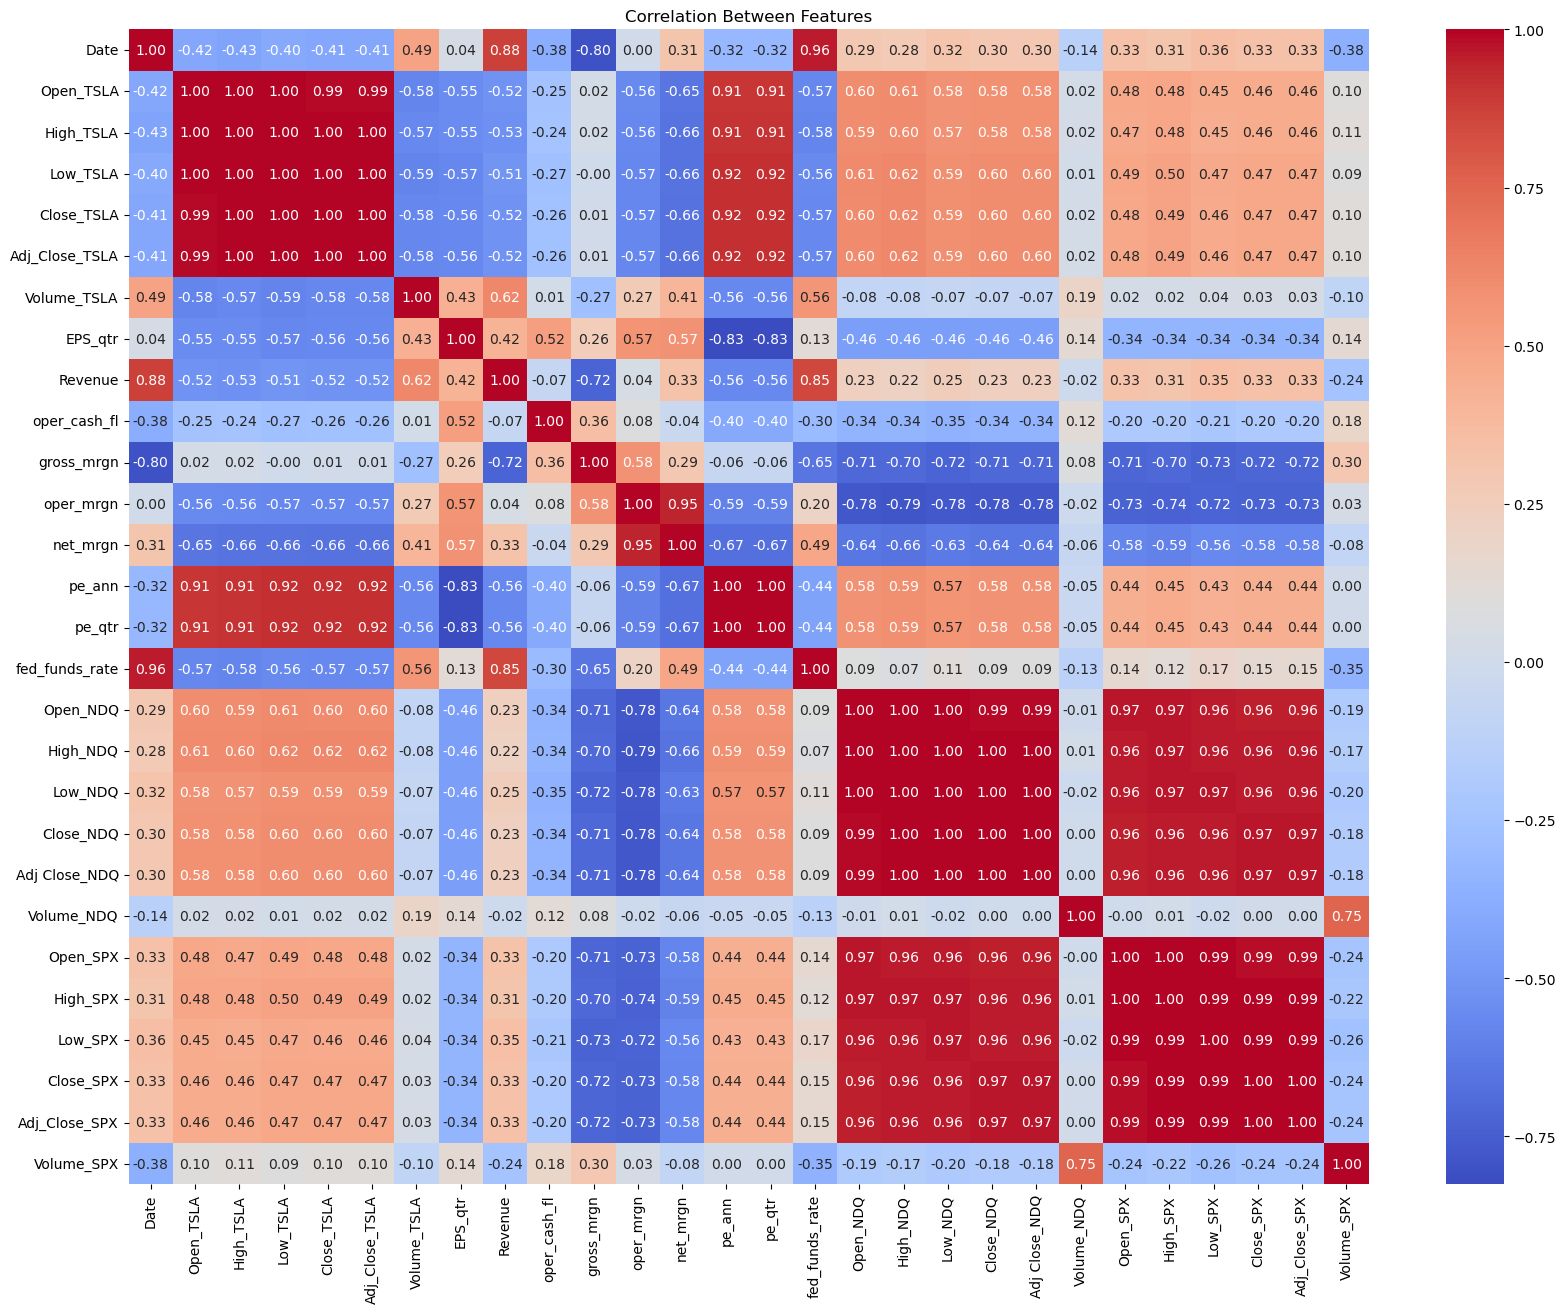

In [22]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws=None)
plt.title('Correlation Between Features')
plt.show()

# Remove Irrelevant Variables

In [67]:
#df = df.drop(columns=[''])

In [ ]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Divide features into arrays by type
tesla = [
  
]
nasdaq = [
  
]
# Categorical is assumed because original dataset did not have a README file defining these feature names
# Ambiguous on m_dep, n_cores (number or type), and price range (could be basic, low, medium, high)
spx = [
  
]

### Display highest correlations between target and the other features in our dataset



In [69]:
df.corr().abs()['Close_TSLA'].sort_values(ascending=False)

Close_TSLA        1.000000
Adj_Close_TSLA    1.000000
Low_TSLA          0.996774
High_TSLA         0.995847
Open_TSLA         0.990687
pe_ann            0.917840
pe_qtr            0.917840
net_mrgn          0.662506
High_NDQ          0.616631
Open_NDQ          0.602840
Adj Close_NDQ     0.599798
Close_NDQ         0.599798
Low_NDQ           0.588352
Volume_TSLA       0.575574
oper_mrgn         0.571847
fed_funds_rate    0.566445
EPS_qtr           0.563505
Revenue           0.516594
High_SPX          0.493587
Open_SPX          0.477884
Close_SPX         0.474634
Adj_Close_SPX     0.474634
Low_SPX           0.462141
Date              0.412917
oper_cash_fl      0.257424
Volume_SPX        0.102642
Volume_NDQ        0.018834
gross_mrgn        0.005974
Name: Close_TSLA, dtype: float64

### Key Variables Visualizations

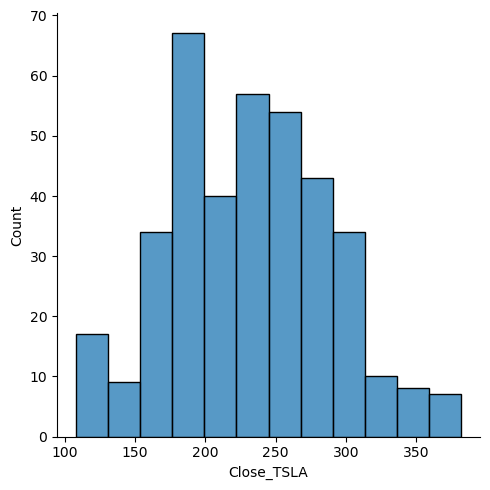

In [70]:
sns.displot(df, x='Close_TSLA')

<Figure size 1200x5600 with 0 Axes>

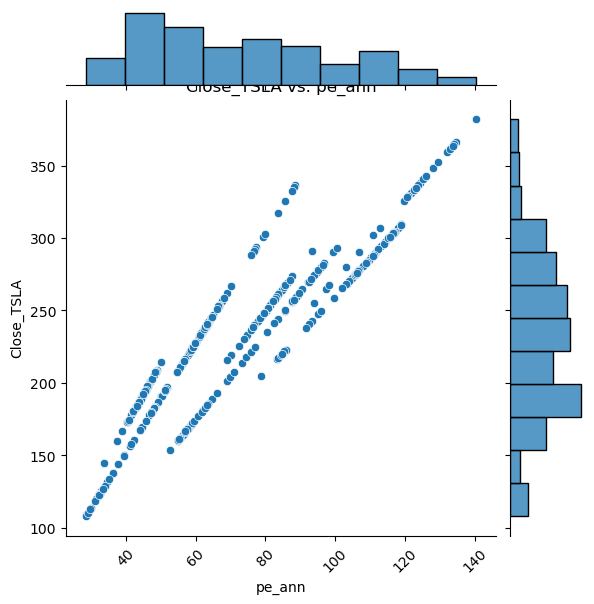

In [71]:
target_y = 'Close_TSLA'
column_x = 'pe_ann'

plt.figure(figsize=(12, 56))
sns.jointplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x5600 with 0 Axes>

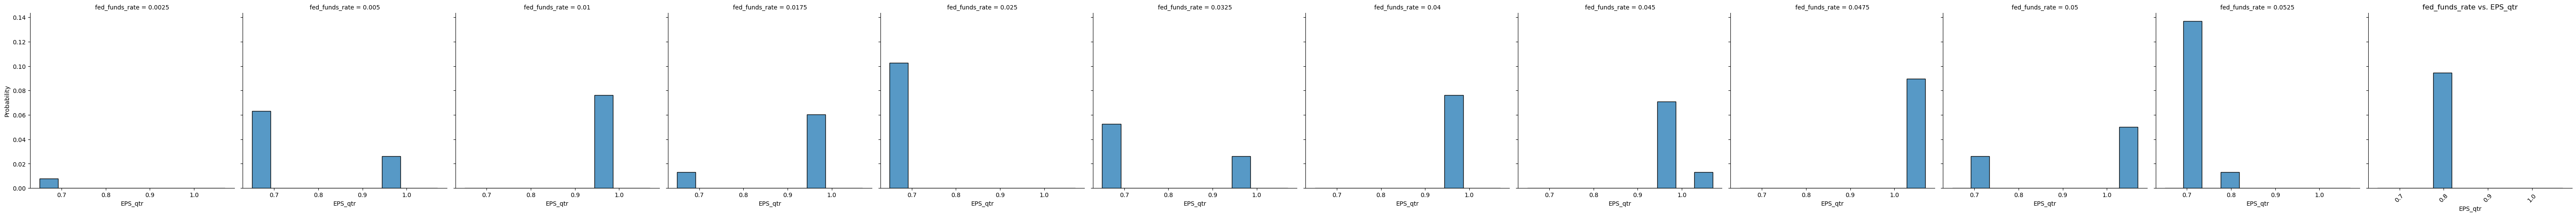

In [74]:
target_y = 'fed_funds_rate'
column_x = 'EPS_qtr'

plt.figure(figsize=(12, 56))
sns.displot(x=column_x, col=target_y, data=df, stat="probability")
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

<Figure size 1e+06x1e+06 with 0 Axes>

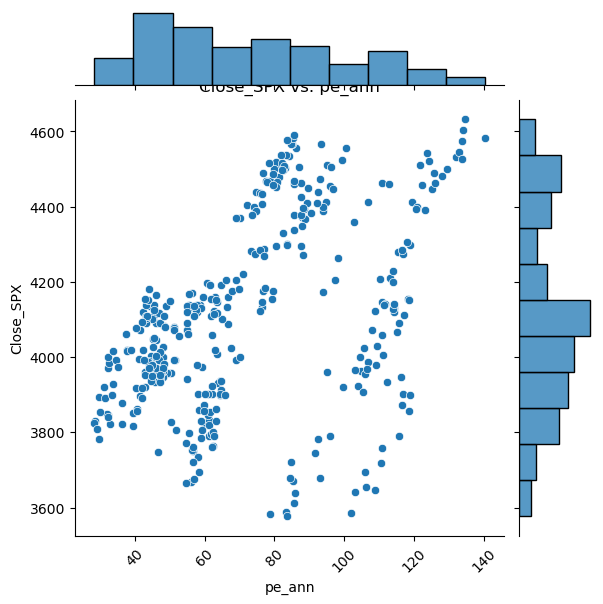

In [79]:
target_y = 'Close_SPX'
column_x = 'pe_ann'

plt.figure(figsize=(10000, 10000))
sns.jointplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

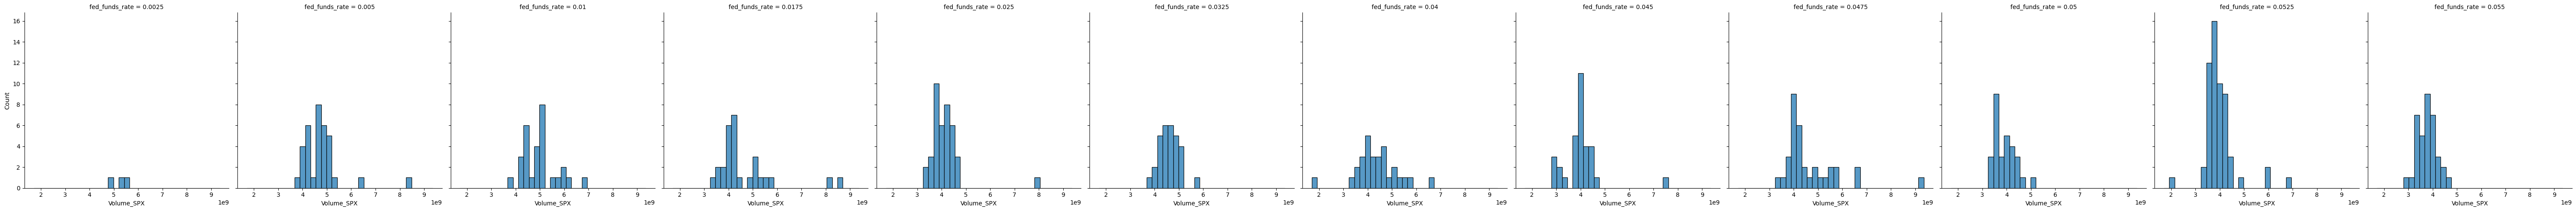

In [82]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_SPX", col="fed_funds_rate")


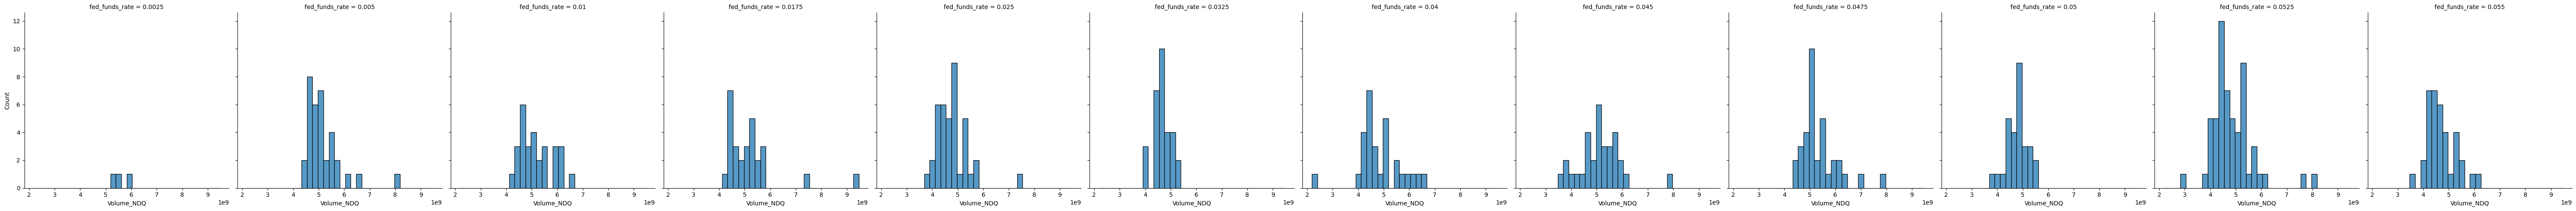

In [84]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_NDQ", col="fed_funds_rate")

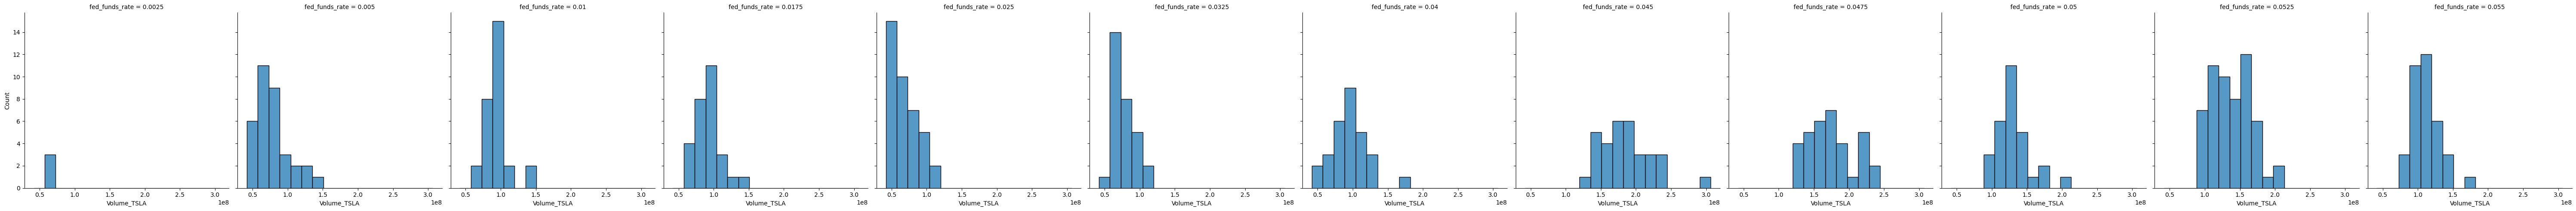

In [85]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_TSLA", col="fed_funds_rate")

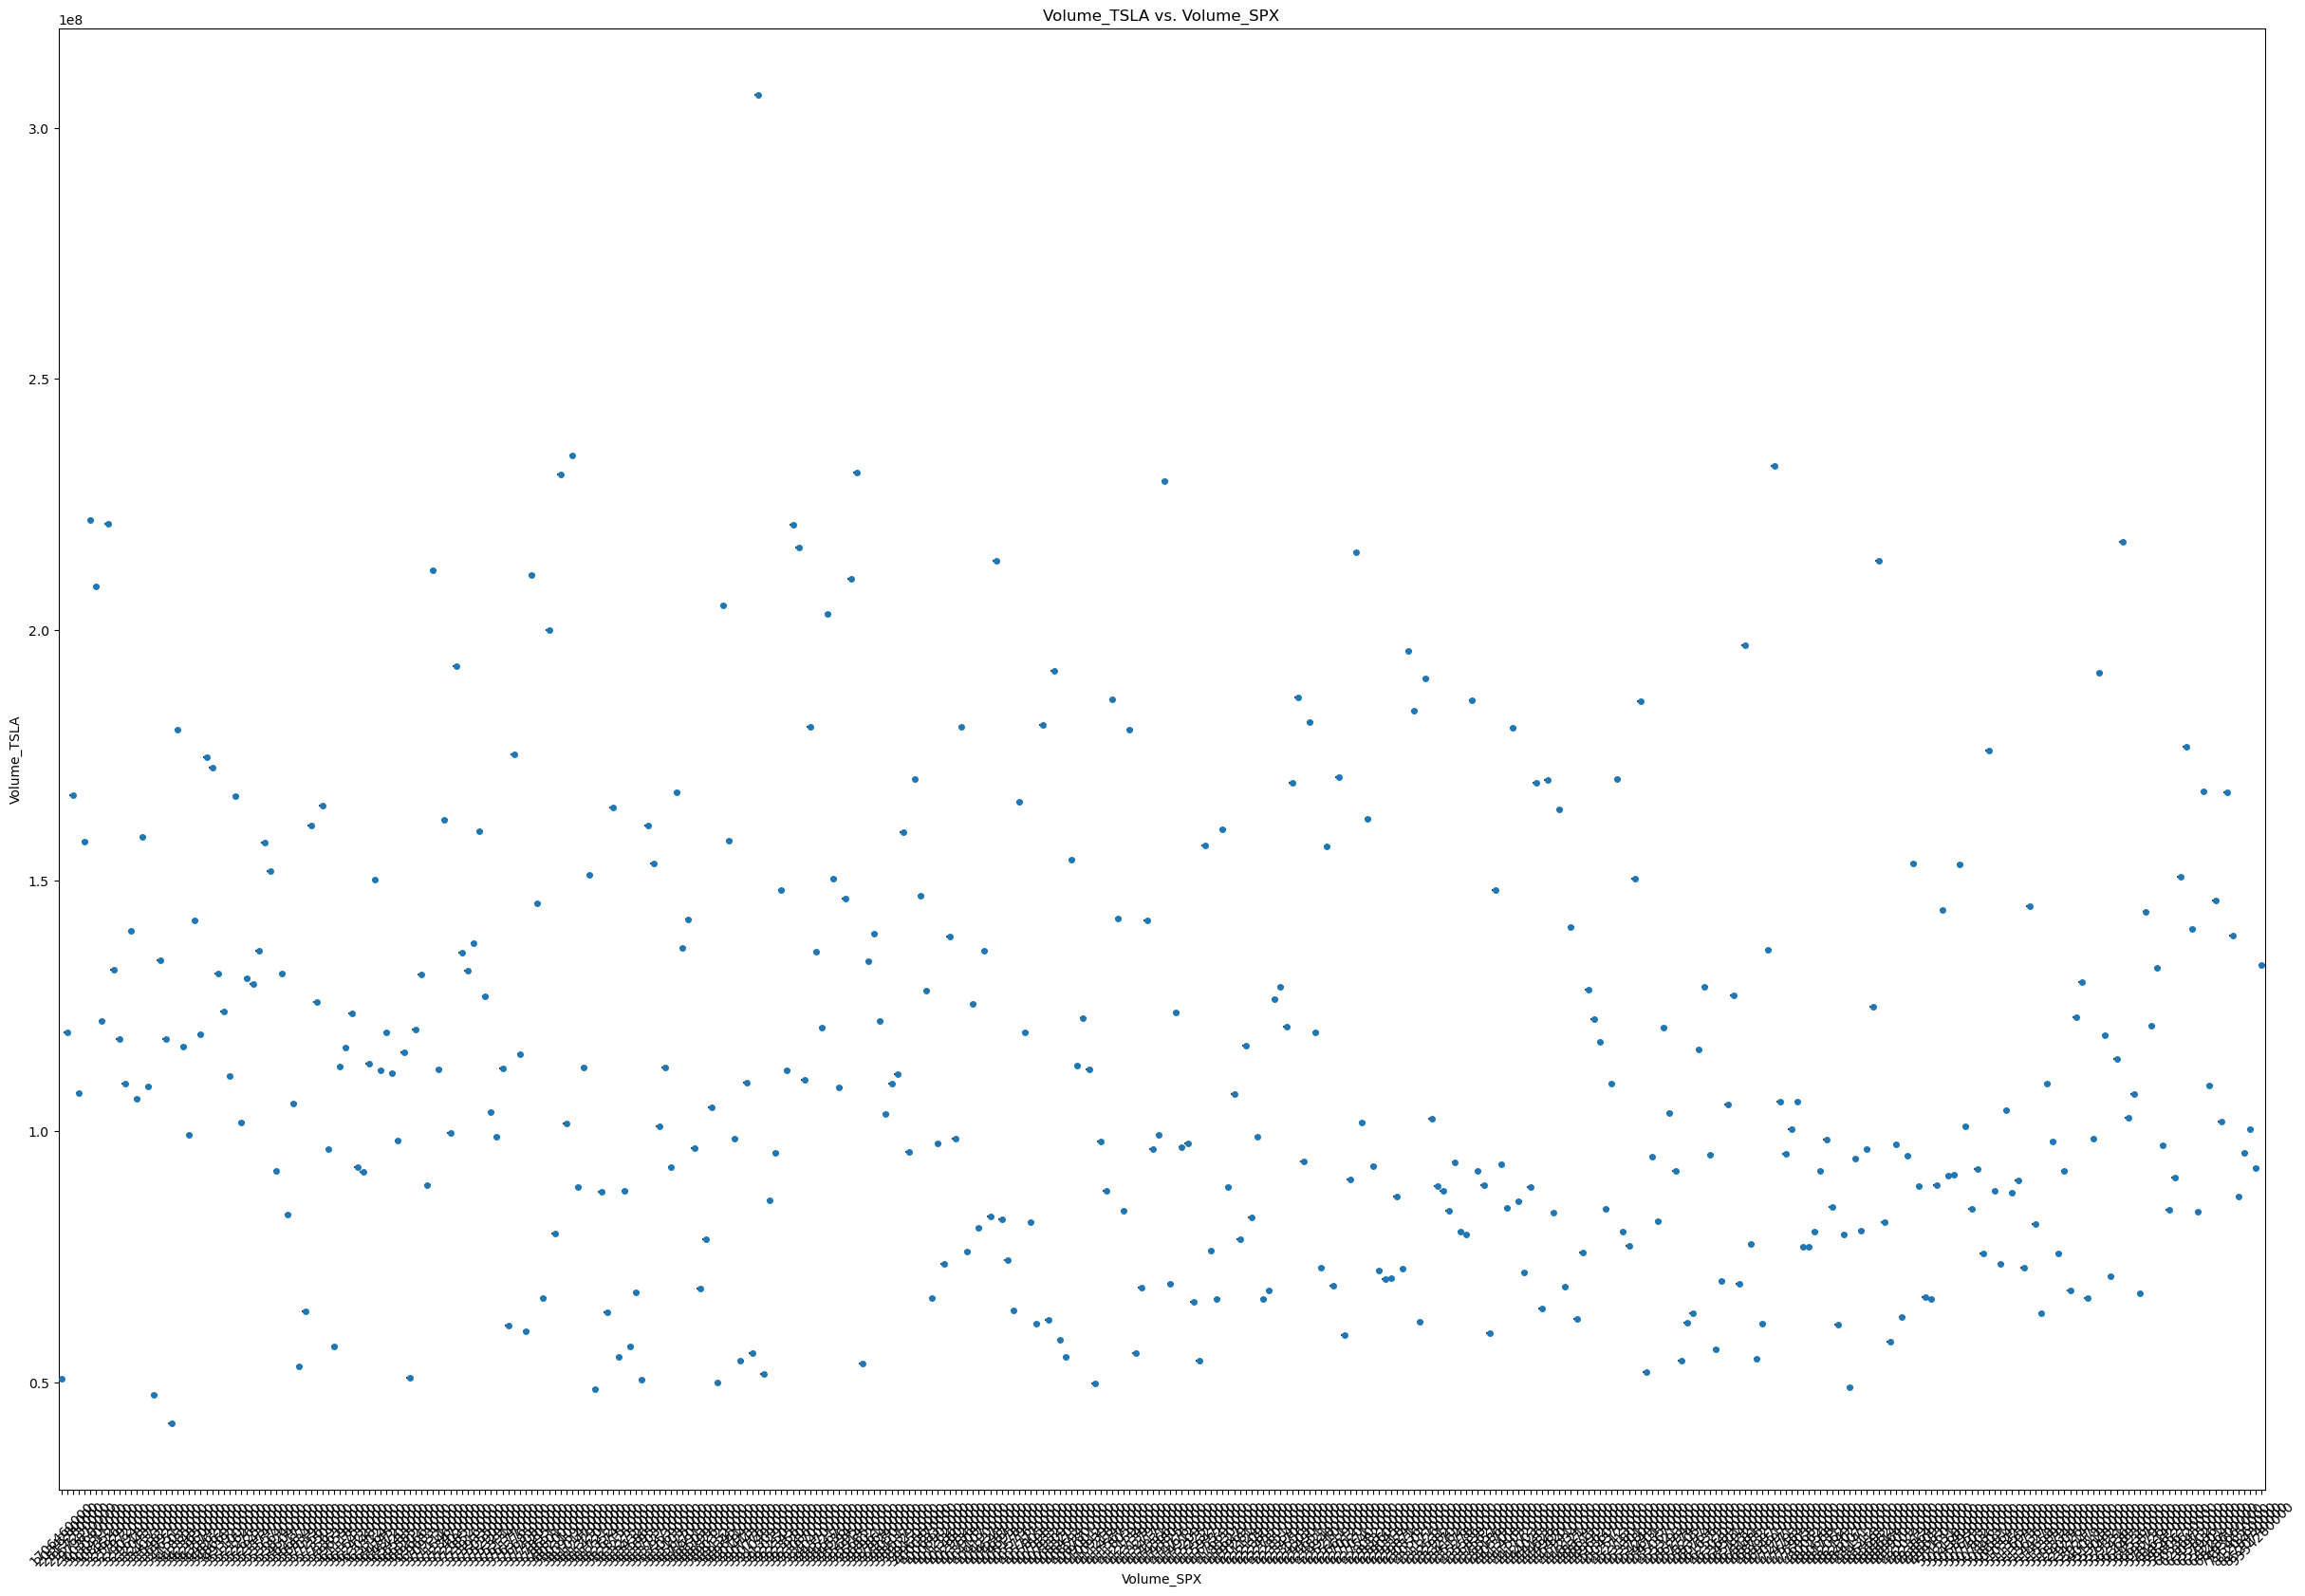

In [87]:
target_y = 'Volume_TSLA'
column_x = 'Volume_SPX'

plt.figure(figsize=(30, 20))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()